In [1]:
from BoundaryProblem import BoundaryProblem
from PlotSolutions import PlotSolutions
from HeatProblem import HeatProblem

In [2]:
plotter = PlotSolutions()

Boundary problem
=====

In [2]:
boundary_solver = BoundaryProblem()
mesh, u, h = boundary_solver.solve_problem('pow(x[0], 2) + pow(x[1], 2)', '2.0*pow(x[0], 2)/R + 2.0*pow(x[1], 2)/R', '-4.0 + alfa*(pow(x[0], 2) + pow(x[1], 2))', 'u1', \
                             '$x^{2}+y^{2}$')

L2-error =  0.018439916468788654
C-error =  0.013537428336913404


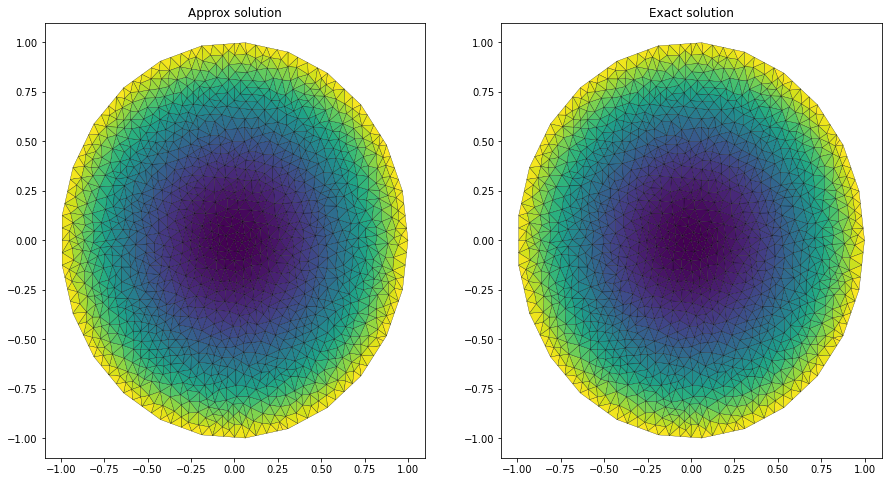

In [4]:
plotter.create_plot(mesh, u, h, (15, 8))

Heat conduction problem
========

In [3]:
heat_solver = HeatProblem()
error_L2, error_C, zfaces_u, zfaces_u_D, mesh = heat_solver.solve_problem('(pow(x[0], 2) + pow(x[1], 2)) * pow(t, 2)', '(2.0*pow(x[0], 2)/R + 2.0*pow(x[1], 2)/R) * pow(t, 2)', \
                            '2.0*(pow(x[0], 2) + pow(x[1], 2))*t - 4.0*alfa*pow(t, 2)')

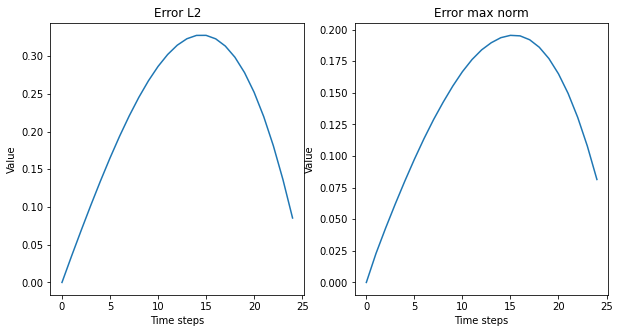

In [4]:
plotter.plot_error(error_L2, error_C, figsize = (10, 5))

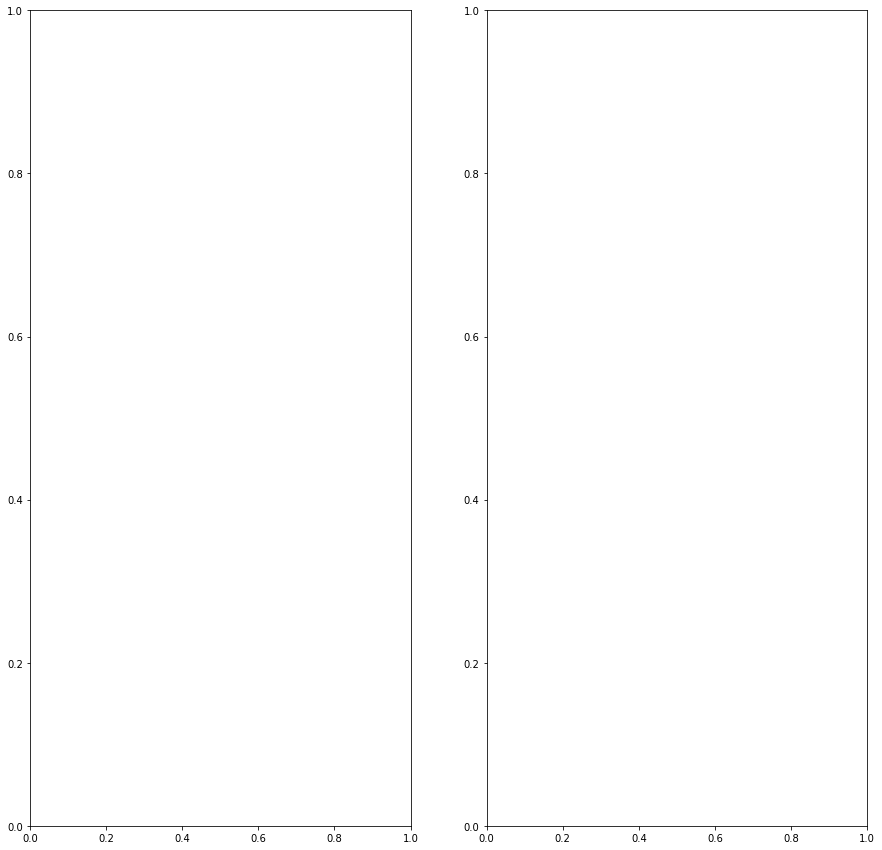

In [5]:
anim = plotter.create_gif(zfaces_u[1:], zfaces_u_D[1:], mesh)
#anim.save('tmp.gif', writer='imagemagick')
HTML(anim.to_html5_video())